In [1]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

CPU times: user 9.19 ms, sys: 582 µs, total: 9.77 ms
Wall time: 9.55 ms


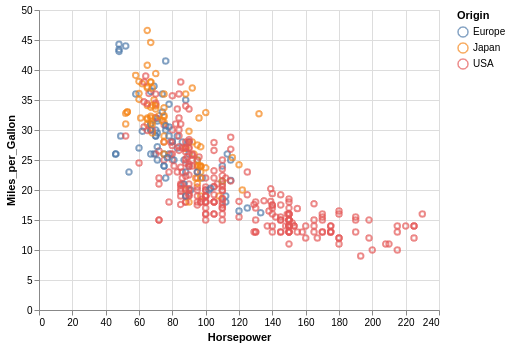

In [3]:
df = pd.read_json('cars.json')

%time alt.Chart(df).mark_point().encode(x='Horsepower', y='Miles_per_Gallon', color='Origin',)

In [4]:
import vega.altair
alt.data_transformers.enable('streaming')
chart = alt.Chart(df).mark_point().encode(
    x='Horsepower', 
    y='Miles_per_Gallon',
    color='Origin',
)

In [5]:
print(chart.to_json(indent=2))

{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.8.1.json",
  "config": {
    "view": {
      "continuousHeight": 300,
      "continuousWidth": 400
    }
  },
  "data": {
    "name": "data"
  },
  "encoding": {
    "color": {
      "field": "Origin",
      "type": "nominal"
    },
    "x": {
      "field": "Horsepower",
      "type": "quantitative"
    },
    "y": {
      "field": "Miles_per_Gallon",
      "type": "quantitative"
    }
  },
  "mark": "point"
}


In [6]:
from vega.widget import VegaWidget

In [7]:
widget = VegaWidget(spec=chart.to_dict())
display(widget)
%time widget.update('data', insert=df)

VegaWidget()

CPU times: user 6.28 ms, sys: 0 ns, total: 6.28 ms
Wall time: 5.61 ms
